In [77]:
import pandas as pd
from bertopic import BERTopic
import nltk
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model)

# read data
df = pd.read_csv('../data/wps_speeches.csv')

In [79]:
df['only text'] = df['only text'].astype(str)
docs = df['only text'].tolist()
years = df['year'].tolist()

In [80]:
# get topics and probs
topics, probs = topic_model.fit_transform(docs)

In [81]:
topic_model.get_topic_info()

Topic  Count                                  Name  \
0      -1    888     -1_women_violence_security_sexual   
1       0    177     0_trafficking_human_persons_crime   
2       1    113     1_sexual_violence_conflict_united   
3       2     58      2_asean_indonesia_violence_women   
4       3     53    3_chile_civilians_protection_women   
..    ...    ...                                   ...   
57     56     12   56_afghanistan_afghan_taliban_women   
58     57     12         57_sexual_isis_nadia_violence   
59     58     11        58_prize_nobel_mediation_peace   
60     59     11     59_agenda_sustainable_women_peace   
61     60     11  60_ireland_peace_security_resolution   

                                       Representation  \
0   [women, violence, security, sexual, peace, con...   
1   [trafficking, human, persons, crime, slavery, ...   
2   [sexual, violence, conflict, united, council, ...   
3   [asean, indonesia, violence, women, malaysia, ...   
4   [chile, civilians, protection, women, girls, c...   
..                                                ...   
57  [afghanistan, afghan, taliban, women, governme...   
58  [sexual, isis, nadia, violence, crimes, murad,...   
59  [prize, nobel, mediation, peace, women, womens...   
60  [agenda, sustainable, women, peace, developmen...   
61  [ireland, peace, security, resolution, women, ...   

                                  Representative_Docs  
0   [ Allow me at the outset to thank you, Sir, fo...  
1   [ Let me first thank the United Kingdom presid...  
2   [ I would like to thank the United Kingdom lea...  
3   [ I have the honour to speak on behalf of the ...  
4   [ Chile thanks the Rwandan presidency for havi...  
..                                                ...  
57  [ First, allow me to congratulate you, Mr. Pre...  
58  [ I wish to begin by acknowledging the leaders...  
59  [ I thank you, Madam President, for having org...  
60  [ I thank the Spanish presidency of the Securi...  
61  [ I am grateful to the Council for the opportu...  

[62 rows x 5 columns]

In [82]:
topic_model.visualize_topics()

In [83]:
# reduce topics (from 58 to 10)
topic_model.reduce_topics(docs, nr_topics=10)

# Access updated topics
topics = topic_model.topics_
topic_model.get_topic_info()

Topic  Count                                     Name  \
0     -1    888         -1_women_violence_security_peace   
1      0    934        0_women_peace_security_resolution   
2      1    407         1_sexual_violence_conflict_women   
3      2    177        2_trafficking_human_persons_crime   
4      3     58          3_women_ukraine_security_rights   
5      4     30       4_peacebuilding_nations_united_pbc   
6      5     25           5_syrian_sexual_violence_syria   
7      6     23     6_displaced_women_girls_displacement   
8      7     12        7_afghanistan_afghan_women_womens   
9      8     12  8_venezuela_operations_armed_bolivarian   

                                      Representation  \
0  [women, violence, security, peace, sexual, con...   
1  [women, peace, security, resolution, conflict,...   
2  [sexual, violence, conflict, women, united, na...   
3  [trafficking, human, persons, crime, victims, ...   
4  [women, ukraine, security, rights, conflict, p...   
5  [peacebuilding, nations, united, pbc, report, ...   
6  [syrian, sexual, violence, syria, women, girls...   
7  [displaced, women, girls, displacement, refuge...   
8  [afghanistan, afghan, women, womens, rights, t...   
9  [venezuela, operations, armed, bolivarian, vio...   

                                 Representative_Docs  
0  [ Allow me at the outset to thank you, Sir, fo...  
1  [ I am pleased to speak first on behalf of the...  
2  [ At the outset, I would like to thank you, Ma...  
3  [ Ijoin the previous speakers in commending yo...  
4  [ Allow me to thank the Secretary-General; Ms....  
5  [ My delegation wants to congratulate you, Sir...  
6  [ At the outset, I should like to congratulate...  
7  [ I thank you, Madam President, for convening ...  
8  [ At the outset, I would like to thank the Uni...  
9  [ We welcome the convening of today's meeting ...

In [84]:
topic_model.visualize_topics()

In [85]:
topic_dfs = {}

for topic in set(topic_model.topics_):
    topic_docs = [doc for doc, t in zip(docs, topic_model.topics_) if t == topic]
    topic_dfs[f"topic_{topic}"] = pd.DataFrame({"Document": topic_docs, "Topic": topic})

In [86]:
topic_dfs["topic_3"]

Document  Topic
0    I would like to echo previous speakers in wel...      3
1    Let me thank you, Mr. President, and the dele...      3
2    I would like to begin by commending the presi...      3
3    I join previous speakers in thanking you, Mr....      3
4    At the outset, let me join previous speakers ...      3
5    With regard to the statement made by the repr...      3
6    I would like to begin by commending you, Mada...      3
7    First, Madam President, allow me to thank you...      3
8    Allow me first to express my thanks to you, M...      3
9    First of all, I would like to apologize for a...      3
10   Having followed the discussions that evolved ...      3
11   Again, I apologize for asking for the floor. ...      3
12   I apologize for keeping the Council at work a...      3
13   I would like to thank you, Mr. President, for...      3
14   At the outset, I would like to thank you, Mad...      3
15   At the outset, I would like to thank the Unit...      3
16   I thank the Government of Azerbaijan for orga...      3
17   I would like to thank the Azerbaijani preside...      3
18   Austria is grateful to Azerbaijan for conveni...      3
19   We would like to express our appreciation to ...      3
20   At the outset, I would like to thank Azerbaij...      3
21   Allow me to congratulate the delegation of Az...      3
22   We thank the Secretary- General, the Executiv...      3
23   At the outset, I would like to congratulate y...      3
24   First of all, Georgia fully associates itself...      3
25   I wish to thank you, Madam President, for hav...      3
26   I thank you, Madam President, for holding tod...      3
27   We have been compelled to take the floor agai...      3
28   I thank you, Sir, for giving the floor to Ukr...      3
29   I would like very briefly to respond to the s...      3
30   I apologise for taking the floor again. I wil...      3
31   I wish to thank you, Madam President, for con...      3
32   Ukraine associates itself with the statement ...      3
33   IfI may, I would like to comment on the state...      3
34   If I am not mistaken, the topic of today's de...      3
35   The second statement by the representative of...      3
36   I, too, wish to thank you, Mr. President, for...      3
37   I would like to respond to the statement made...      3
38   I thank you, Mr. President, for giving me the...      3
39   I thank you, Mr. President, for allowing us t...      3
40   I requested the floor to reply to the comment...      3
41   This statement will be even briefer than my l...      3
42   Georgia aligns itself with the statement just...      3
43   Allow me to thank the Secretary-General; Ms. ...      3
44   Georgia aligns itself with the statement made...      3
45   We would like to express our appreciation to ...      3
46   First of all, I would like to reiterate our e...      3
47   First of all, I would like to thank the deleg...      3
48   To be fully consistent with the agenda for to...      3
49   Let me first express our gratitude to the Fre...      3
50   I wish to thank you very much, Madam Presiden...      3
51   At the outset, I would like to commend the Fr...      3
52   I represent Ukraine as the President's specia...      3
53   Let mejoin my colleagues in expressing our ap...      3
54   Armenia would like to express appreciation to...      3
55   I would like to thank you, Madam President, f...      3
56   I would like to thank the presidency of the R...      3
57   At the outset, we would like to thank the Uni...      3

In [87]:
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [88]:
topics_over_time = topic_model.topics_over_time(docs, years)
topic_model.visualize_topics_over_time(topics_over_time, topics=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [89]:
## CHINA, DOES NOT WORK (TOO LITTLE DATA?? ONLY EVER TWO TOPICS)

In [90]:
vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model)

# read data
df = pd.read_csv('../data/wps_speeches.csv')
df['only text'] = df['only text'].astype(str)
china_df = df[df['country/organization'] == 'China']
china_docs = china_df['only text'].tolist()
years = china_df['year'].tolist()

# get topics and probs
topics, probs = topic_model.fit_transform(china_docs)
#topic_model.reduce_topics(china_docs, nr_topics=10)

# Access updated topics
#topics = topic_model.topics_
topic_model.get_topic_info()
#topic_model.visualize_topics()
topics_over_time = topic_model.topics_over_time(china_docs, years)
topic_model.visualize_topics_over_time(topics_over_time)


In [91]:
topic_model.get_topic_info()

Topic  Count                                      Name  \
0     -1      6  -1_women_conflict_international_security   
1      0     26      0_women_peace_security_international   
2      1     15          1_sexual_violence_conflict_women   

                                      Representation  \
0  [women, conflict, international, security, tra...   
1  [women, peace, security, international, countr...   
2  [sexual, violence, conflict, women, internatio...   

                                 Representative_Docs  
0  [ China welcomes the initiative of the United ...  
1  [ Before making a formal statement, I want to ...  
2  [ At the outset, China strongly condemns the s...

In [92]:
# WOMEN vs. MEN

In [93]:
# Men mentioned
men_boys_keywords = r"\b(men|man|boy|boys)\b"
# Women mentioned
women_girls_keywords = r"\b(women|woman|girl|girls)\b"

def filter_sentences(text, keyword_pattern):
    '''get sentences with keyword pattern (men or women)'''
    sentences = nltk.sent_tokenize(text)
    matching_sentences = [sentence for sentence in sentences if re.search(keyword_pattern, sentence, re.IGNORECASE)]

    return matching_sentences

def filter_sentences_only(text, keyword_pattern, exclude_pattern=None):
    '''get sentences with exclusive keyword pattern (e.g, "women" occurs in sentence but not "men")'''
    sentences = nltk.sent_tokenize(text)
    if exclude_pattern:
        matching_sentences = [sentence for sentence in sentences if re.search(keyword_pattern, sentence, re.IGNORECASE) and not re.search(exclude_pattern, sentence, re.IGNORECASE)]
    else:
        matching_sentences = [sentence for sentence in sentences if re.search(keyword_pattern, sentence, re.IGNORECASE)]
    return matching_sentences

def filter_text(df, keyword_pattern):
    filtered_sentences = []
    df['only text'] = df['only text'].astype(str)
    for text in df['only text']:
        sentences = filter_sentences(text, keyword_pattern)
        filtered_sentences.extend(sentences)

    return filtered_sentences

def filter_text_only(df, keyword_pattern, exclude_pattern=None):
    filtered_sentences = []
    df['only text'] = df['only text'].astype(str)
    for text in df['only text']:
        sentences = filter_sentences_only(text, keyword_pattern, exclude_pattern)
        filtered_sentences.extend(sentences)

    return filtered_sentences

df_men_boys_sentences = filter_text(df, men_boys_keywords)
df_women_girls_sentences = filter_text(df, women_girls_keywords)
df_men_boys_sentences_only = filter_text_only(df, men_boys_keywords, exclude_pattern=women_girls_keywords)
df_women_girls_sentences_only = filter_text_only(df, women_girls_keywords, exclude_pattern=men_boys_keywords)

In [94]:
# Men mentioned
men_keywords = r"\b(men|man)\b"
# Women mentioned
women_keywords = r"\b(women|woman)\b"

df_men_sentences = filter_text(df, men_keywords)
df_women_sentences = filter_text(df, women_keywords)
df_men_sentences_only = filter_text_only(df, men_keywords, exclude_pattern=women_keywords)
df_women_sentences_only = filter_text_only(df, women_keywords, exclude_pattern=men_keywords)

In [95]:
# Men mentioned
boys_keywords = r"\b(boy|boys)\b"
# Women mentioned
girls_keywords = r"\b(girl|girls)\b"

df_boys_sentences = filter_text(df, boys_keywords)
df_girls_sentences = filter_text(df, girls_keywords)
df_boys_sentences_only = filter_text_only(df, boys_keywords, exclude_pattern=girls_keywords)
df_girls_sentences_only = filter_text_only(df, girls_keywords, exclude_pattern=boys_keywords)

In [96]:
total_men_sentences = len(df_men_sentences)
men_with_women = total_men_sentences - len(df_men_sentences_only)
men_without_women = len(df_men_sentences_only)

men_with_women_percentage = (men_with_women / total_men_sentences) * 100
men_without_women_percentage = (men_without_women / total_men_sentences) * 100

total_women_sentences = len(df_women_sentences)
women_with_men = total_women_sentences - len(df_women_sentences_only)
women_without_men = len(df_women_sentences_only)

women_with_men_percentage = (women_with_men / total_women_sentences) * 100
women_without_men_percentage = (women_without_men / total_women_sentences) * 100

print(f"Amount of sentences with occurrence of 'men' or 'man': {total_men_sentences}")
print(f"Amount of sentences with occurrence of 'women' or 'woman': {total_women_sentences}")
print(f"Amount of sentences with occurrence of 'men, man' (no women mentioned): {men_without_women}")
print(f"Amount of sentences with occurrence of 'women, woman' (no men mentioned): {women_without_men}")
print(f"Percentage of sentences with men and women mentioned together (of men): {men_with_women_percentage:.2f}%")
print(f"Percentage of sentences with men mentioned without women: {men_without_women_percentage:.2f}%")
print(f"Percentage of sentences with women and men mentioned together (of women): {women_with_men_percentage:.2f}%")
print(f"Percentage of sentences with women mentioned without men: {women_without_men_percentage:.2f}%")

Amount of sentences with occurrence of 'men' or 'man': 1343
Amount of sentences with occurrence of 'women' or 'woman': 31123
Amount of sentences with occurrence of 'men, man' (no women mentioned): 268
Amount of sentences with occurrence of 'women, woman' (no men mentioned): 30048
Percentage of sentences with men and women mentioned together (of men): 80.04%
Percentage of sentences with men mentioned without women: 19.96%
Percentage of sentences with women and men mentioned together (of women): 3.45%
Percentage of sentences with women mentioned without men: 96.55%


In [97]:
total_men_sentences = len(df_boys_sentences)
men_with_women = total_men_sentences - len(df_boys_sentences_only)
men_without_women = len(df_boys_sentences_only)

men_with_women_percentage = (men_with_women / total_men_sentences) * 100
men_without_women_percentage = (men_without_women / total_men_sentences) * 100

total_women_sentences = len(df_girls_sentences)
women_with_men = total_women_sentences - len(df_girls_sentences_only)
women_without_men = len(df_girls_sentences_only)

women_with_men_percentage = (women_with_men / total_women_sentences) * 100
women_without_men_percentage = (women_without_men / total_women_sentences) * 100

print(f"Amount of sentences with occurrence of 'boys' or 'boy': {total_men_sentences}")
print(f"Amount of sentences with occurrence of 'girls' or 'girl': {total_women_sentences}")
print(f"Amount of sentences with occurrence of 'boy, boys' (no girls mentioned): {men_without_women}")
print(f"Amount of sentences with occurrence of 'girl, girls' (no boys mentioned): {women_without_men}")
print(f"Percentage of sentences with boys and girls mentioned together (of boys): {men_with_women_percentage:.2f}%")
print(f"Percentage of sentences with boys mentioned without girls: {men_without_women_percentage:.2f}%")
print(f"Percentage of sentences with girls and boys mentioned together (of girls): {women_with_men_percentage:.2f}%")
print(f"Percentage of sentences with girls mentioned without boys: {women_without_men_percentage:.2f}%")

Amount of sentences with occurrence of 'boys' or 'boy': 379
Amount of sentences with occurrence of 'girls' or 'girl': 4518
Amount of sentences with occurrence of 'boy, boys' (no girls mentioned): 129
Amount of sentences with occurrence of 'girl, girls' (no boys mentioned): 4268
Percentage of sentences with boys and girls mentioned together (of boys): 65.96%
Percentage of sentences with boys mentioned without girls: 34.04%
Percentage of sentences with girls and boys mentioned together (of girls): 5.53%
Percentage of sentences with girls mentioned without boys: 94.47%


In [98]:
total_men_sentences = len(df_men_boys_sentences)
men_with_women = total_men_sentences - len(df_men_boys_sentences_only)
men_without_women = len(df_men_boys_sentences_only)

men_with_women_percentage = (men_with_women / total_men_sentences) * 100
men_without_women_percentage = (men_without_women / total_men_sentences) * 100

total_women_sentences = len(df_women_girls_sentences)
women_with_men = total_women_sentences - len(df_women_girls_sentences_only)
women_without_men = len(df_women_girls_sentences_only)

women_with_men_percentage = (women_with_men / total_women_sentences) * 100
women_without_men_percentage = (women_without_men / total_women_sentences) * 100

print(f"Amount of sentences with occurrence of 'men, man, boy, or boys': {total_men_sentences}")
print(f"Amount of sentences with occurrence of 'women, woman, girl, or girls': {total_women_sentences}")
print(f"Amount of sentences with occurrence of 'men, man, boy, or boys' (no women/girls mentioned): {men_without_women}")
print(f"Amount of sentences with occurrence of 'women, woman, girl, or girls' (no men/boys mentioned): {women_without_men}")
print(f"Percentage of sentences with men and women mentioned together (of men/boys): {men_with_women_percentage:.2f}%")
print(f"Percentage of sentences with men mentioned without women/girls: {men_without_women_percentage:.2f}%")
print(f"Percentage of sentences with women and men mentioned together (of women/girls): {women_with_men_percentage:.2f}%")
print(f"Percentage of sentences with women mentioned without men: {women_without_men_percentage:.2f}%")

Amount of sentences with occurrence of 'men, man, boy, or boys': 1428
Amount of sentences with occurrence of 'women, woman, girl, or girls': 31439
Amount of sentences with occurrence of 'men, man, boy, or boys' (no women/girls mentioned): 276
Amount of sentences with occurrence of 'women, woman, girl, or girls' (no men/boys mentioned): 30287
Percentage of sentences with men and women mentioned together (of men/boys): 80.67%
Percentage of sentences with men mentioned without women/girls: 19.33%
Percentage of sentences with women and men mentioned together (of women/girls): 3.66%
Percentage of sentences with women mentioned without men: 96.34%


In [99]:
### TOPICS

In [100]:
topic_model = BERTopic(vectorizer_model=vectorizer_model)

## WOMEN ONLY
# get topics and probs
topics, probs = topic_model.fit_transform(df_women_girls_sentences_only)
topic_model.visualize_topics()

In [101]:
topic_model.get_topic_info()

Topic  Count                                          Name  \
0       -1  12082  -1_peacekeeping_participation_conflict_women   
1        0   1141       0_council_councils_security_resolutions   
2        1    588              1_agenda_security_peace_progress   
3        2    567  2_decisionmaking_change_participation_levels   
4        3    558       3_displaced_refugees_internally_refugee   
..     ...    ...                                           ...   
320    319     10      319_equality_empowerment_gaining_culture   
321    320     10              320_quota_bangsamoro_reserved_25   
322    321     10      321_sanctions_regimes_criteria_tribunals   
323    322     10     322_delegation_formulate_signals_welcomes   
324    323     10    323_policing_police_officers_citizenpolice   

                                        Representation  \
0    [peacekeeping, participation, conflict, women,...   
1    [council, councils, security, resolutions, iss...   
2    [agenda, security, peace, progress, implementa...   
3    [decisionmaking, change, participation, levels...   
4    [displaced, refugees, internally, refugee, per...   
..                                                 ...   
320  [equality, empowerment, gaining, culture, diss...   
321  [quota, bangsamoro, reserved, 25, parliament, ...   
322  [sanctions, regimes, criteria, tribunals, desi...   
323  [delegation, formulate, signals, welcomes, mod...   
324  [policing, police, officers, citizenpolice, sk...   

                                   Representative_Docs  
0    [We welcome the call made today in the resolut...  
1    [Since it was adopted, the issue of women's ro...  
2    [Meeting these challenges is critical to makin...  
3    [More attention should be given to women's rol...  
4    [Women and children make up some 80 per cent o...  
..                                                 ...  
320  [The idea that the empowerment of women and gi...  
321  [On 11 January, the Government of Djibouti was...  
322  [At the international level, the use of sancti...  
323  [In the current difficult circumstances, my de...  
324  [The increased participation of women in polic...  

[325 rows x 5 columns]

In [102]:
# reduce topics (from 311 to 10)
topic_model.reduce_topics(df_women_girls_sentences_only, nr_topics=10)

In [103]:
topics = topic_model.topics_
topic_model.get_topic_info()

Topic  Count                                       Name  \
0     -1  12082             -1_women_peace_conflict_womens   
1      0  15990              0_women_security_peace_womens   
2      1   1823        1_girls_women_displaced_trafficking   
3      2    105  2_trafficking_persons_crime_transnational   
4      3     92          3_violence_crimes_sexual_condemns   
5      4     65           4_friends_behalf_delivered_group   
6      5     41                5_chibok_nigeria_boko_haram   
7      6     40          6_arms_violence_treaty_convention   
8      7     37        7_georgia_regions_occupied_georgias   
9      8     12       8_blue_helmets_training_peacekeepers   

                                      Representation  \
0  [women, peace, conflict, womens, security, vio...   
1  [women, security, peace, womens, conflict, res...   
2  [girls, women, displaced, trafficking, childre...   
3  [trafficking, persons, crime, transnational, s...   
4  [violence, crimes, sexual, condemns, acts, rom...   
5  [friends, behalf, delivered, group, aligns, ca...   
6  [chibok, nigeria, boko, haram, girls, 276, rel...   
7  [arms, violence, treaty, convention, trade, do...   
8  [georgia, regions, occupied, georgias, abkhazi...   
9  [blue, helmets, training, peacekeepers, number...   

                                 Representative_Docs  
0  [Greater efforts should be made to promote the...  
1  [The framework provides a unique opportunity t...  
2  [We know that women in camps, women refugees a...  
3  [The United Nations Global Plan of Action to P...  
4  [China condemns all acts of violence against w...  
5  [Germany aligns itself with the statements to ...  
6  [The recent release of the 82 Chibok girls abd...  
7  [Montenegro was among the first five countries...  
8  [While the Government of Georgia spares no eff...  
9  [In our View it is crucial to train Blue Helme...

In [104]:
topic_model.visualize_topics()

0


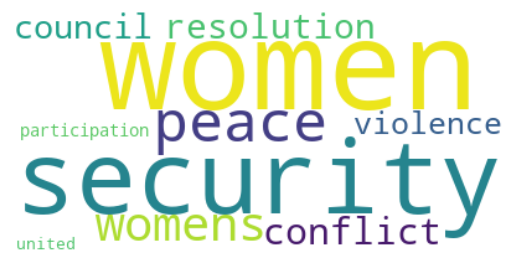

1


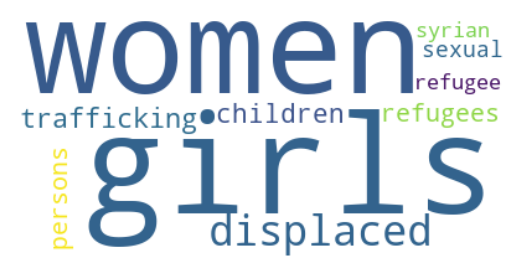

2


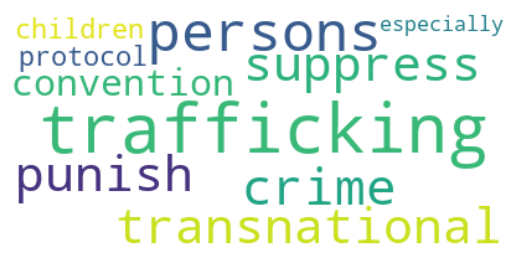

3


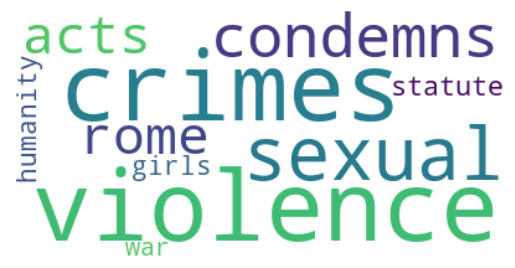

4


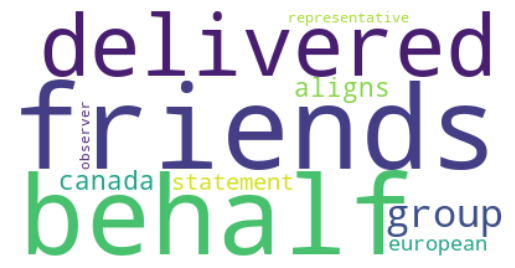

5


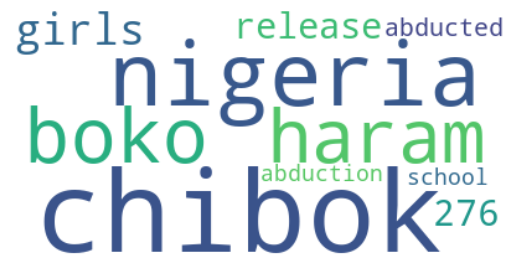

6


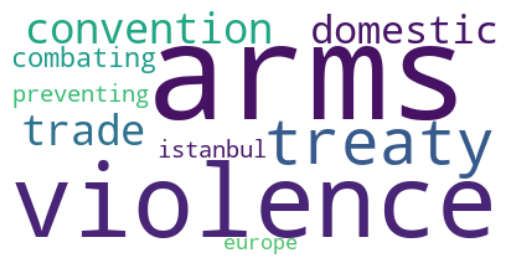

7


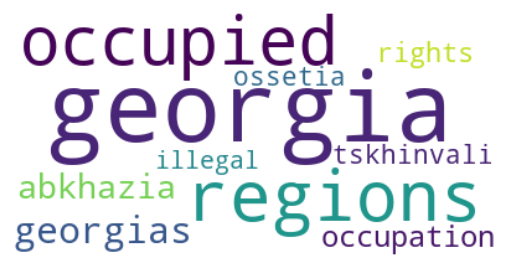

8


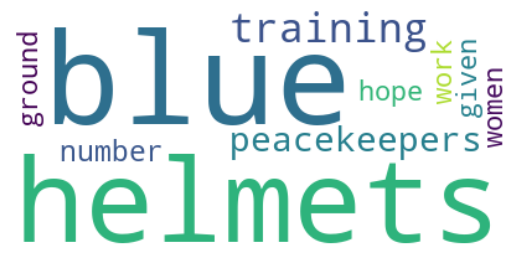

-1


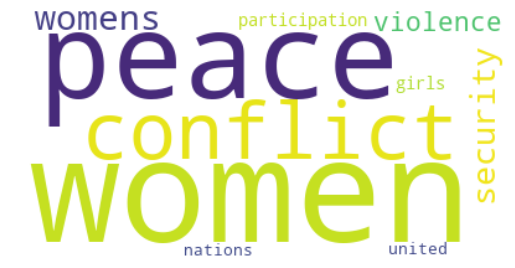

In [105]:
# Show wordcloud
for topic_n in set(topic_model.topics_):
    print(topic_n)
    create_wordcloud(topic_model, topic=topic_n)

In [106]:
topic_model = BERTopic(vectorizer_model=vectorizer_model)

## MEN ONLY
# get topics and probs
topics, probs = topic_model.fit_transform(df_men_boys_sentences_only)
topic_model.get_topic_info()

Topic  Count                           Name  \
0     -1     90  -1_men_boys_violence_conflict   
1      0     82     0_sexual_violence_boys_men   
2      1     28     1_gender_equality_men_role   
3      2     23         2_man_leaders_men_talk   
4      3     22         3_peace_men_table_ones   
5      4     17          4_man_isis_beat_house   
6      5     14       5_cent_nations_united_97   

                                      Representation  \
0  [men, boys, violence, conflict, forced, needs,...   
1  [sexual, violence, boys, men, rape, armed, det...   
2  [gender, equality, men, role, boys, promotion,...   
3  [man, leaders, men, talk, security, run, need,...   
4  [peace, men, table, ones, negotiations, counci...   
5  [man, isis, beat, house, village, older, daugh...   
6  [cent, nations, united, 97, police, military, ...   

                                 Representative_Docs  
0  [For their part, men and boys are often subjec...  
1  [The current report highlights several emergin...  
2  [Thirdly, it has not been mentioned by many pe...  
3  [Finally, we men serve as the link between hom...  
4  [Even ifwomen are present at the table, which ...  
5  [I told the Council about how ISIS attacked my...  
6  [Currently, 97 per cent of peacekeepers and 90...

In [107]:
topic_model.visualize_topics()

0


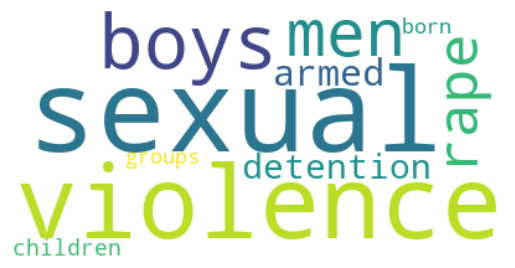

1


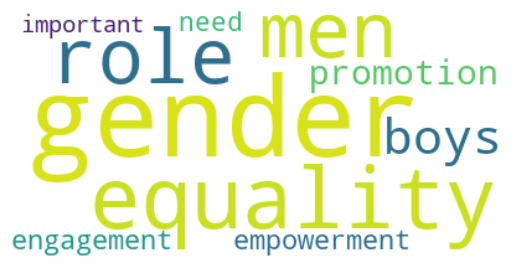

2


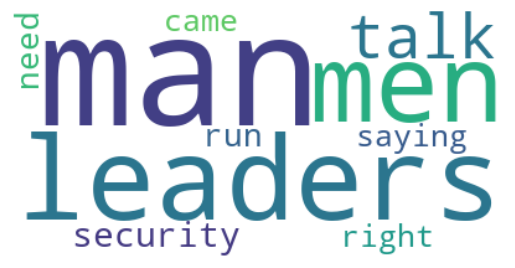

3


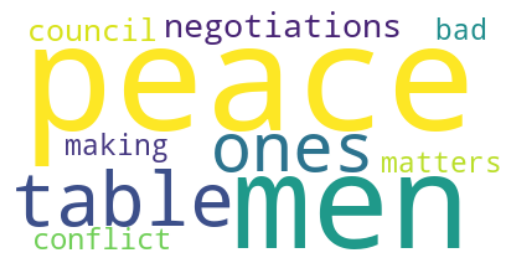

4


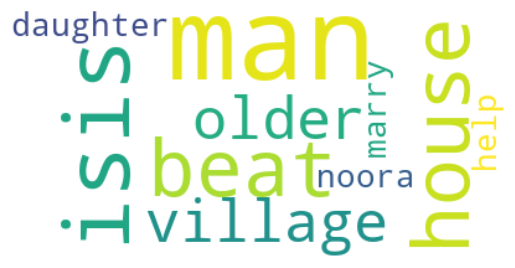

5


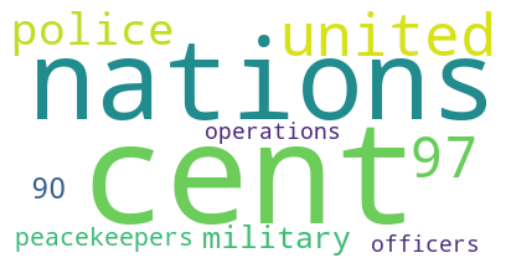

-1


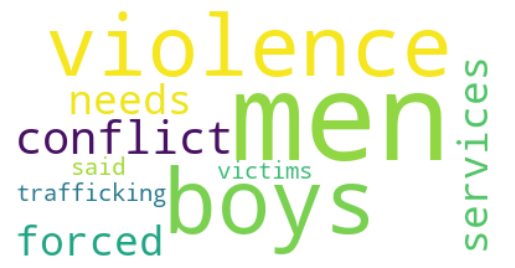

In [108]:
# Show wordcloud
for topic_n in set(topic_model.topics_):
    print(topic_n)
    create_wordcloud(topic_model, topic=topic_n)

In [109]:
docs = df_men_boys_sentences_only
topic_dfs = {}

for topic in set(topic_model.topics_):
    topic_docs = [doc for doc, t in zip(docs, topic_model.topics_) if t == topic]
    topic_dfs[f"topic_{topic}"] = pd.DataFrame({"Document": topic_docs, "Topic": topic})

In [110]:
topic_dfs["topic_5"]

Document  Topic
0   At the United Nations, including in this Counc...      5
1   During the First World War, 80 per cent of tho...      5
2   Most senior posts in United Nations peacekeepi...      5
3   The province also has the densest concentratio...      5
4   As Minister of Defence, 1 note that all of the...      5
5   They hold 32 and 44 per cent of the seats in t...      5
6   But 97 per cent of military peacekeepers are s...      5
7   However, we note with concern the data publish...      5
8   While we welcome the deployment of three all-f...      5
9   Men and boys have a vital role to play, and so...      5
10  In this regard, it is regrettable that the fig...      5
11  Currently, 97 per cent of peacekeepers and 90 ...      5
12  There are many portraits of men in the entranc...      5
13  Female peacekeepers can have access to parts o...      5

In [111]:
### women are much more talked about, with more variety